In [132]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import seaborn as sns
import plotly
from plotly import express as px
from plotly import graph_objects as go

sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(7,4)
matplotlib.rcParams['figure.facecolor']='#00000000'
plt.rcParams['font.family']= 'sans-serif'

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Reading data

In [72]:
df=pd.read_csv('/content/sample_data/bank_marketing_target_dataset.csv')

In [73]:
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

# Exploratory Data Analysis

In [74]:
df.shape

(56373, 17)

In [75]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [76]:
df['age'].mean()

40.99476699838575

In [77]:
df['balance'].mean()

1395.1932485409682

In [78]:
df['duration'].mean()

280.70186081989607

In [79]:
df.describe(percentiles=[0.25,0.5,0.75,0.85,0.95,0.96,0.97,0.98,0.99,0.999])

age        balance           day      duration      campaign  \
count  56373.000000   56373.000000  56373.000000  56373.000000  56373.000000   
mean      40.994767    1395.193249     15.777039    280.701861      2.713267   
std       10.887854    3082.058457      8.342159    281.253563      3.028980   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      81.000000      8.000000    108.000000      1.000000   
50%       39.000000     469.000000     16.000000    192.000000      2.000000   
75%       49.000000    1489.000000     21.000000    346.000000      3.000000   
85%       53.000000    2601.000000     27.000000    488.000000      4.000000   
95%       59.000000    5809.400000     30.000000    840.400000      7.000000   
96%       60.000000    6677.720000     30.000000    914.000000      8.000000   
97%       61.000000    7832.000000     30.000000   1013.840000     10.000000   
98%       66.000000    9618.000000     30.000000   1144.000000     12.000000   
99%       73.000000   13170.880000     31.000000   1372.280000     16.000000   
99.9%     84.000000   33753.096000     31.000000   2231.000000     31.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  56373.000000  56373.000000  
mean      42.402107      0.630266  
std      101.990991      2.303356  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
85%      113.000000      1.000000  
95%      319.000000      4.000000  
96%      339.000000      4.000000  
97%      350.000000      5.000000  
98%      362.000000      6.000000  
99%      371.000000      9.000000  
99.9%    686.628000     23.000000  
max      871.000000    275.000000

In [80]:
df['deposit'].value_counts()

deposit
no     45795
yes    10578
Name: count, dtype: int64

In [81]:
data=df.copy()

In [82]:
categorical_columns = data.select_dtypes(include='object').columns

data[categorical_columns] = data[categorical_columns].astype('category')

In [83]:
ncust_dep_neg_balance=data[(data['balance']<=0) & (data['deposit']=='yes')]['balance'].count()

In [84]:
ncust_neg_balance=data[(data['balance']<=0)]['balance'].count()

In [85]:
(ncust_dep_neg_balance/ncust_neg_balance)*100

11.484786090139556

In [86]:
data = data.drop(data[(data['balance']<=0) & (data['deposit']=='yes')].index)


In [87]:
data.shape

(55369, 17)

In [88]:
layout=go.Layout(template='plotly_dark')

In [89]:
fig = px.histogram(data, x='deposit', color='deposit')
fig.update_layout(xaxis_title='Term deposit subscription',yaxis_title='Total Count of customers')
fig.show()

In [90]:
fig = px.histogram(data, x='job', color='job')
fig.update_layout(xaxis_title='Job Categories of Bank Customers',yaxis_title='Total Count of customers')
fig.show()

Customers who belong to job categories like Management ,blue collar,technicians are approached more compared to other job category customers.

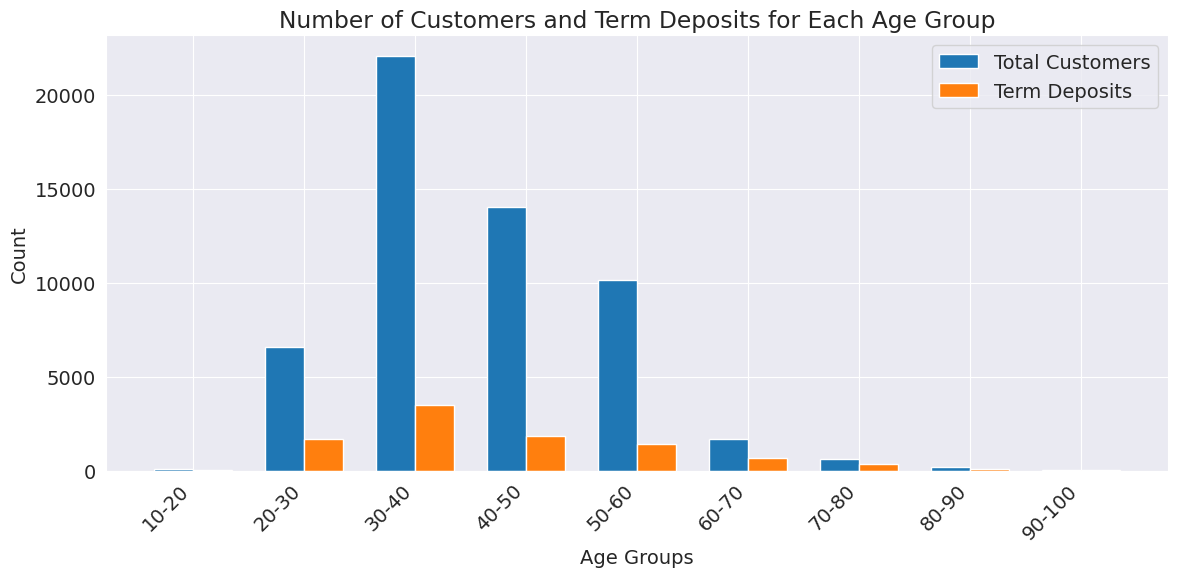

In [92]:

age_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

data1=data.copy()

data1['age_group'] = pd.cut(data1['age'], bins=age_bins, right=False, labels=[f"{start}-{end}" for start, end in zip(age_bins[:-1], age_bins[1:])])

grouped_data = data1.groupby(['age_group', 'deposit']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(12, 6))

total_customers = grouped_data['no'] + grouped_data['yes']

bar_width = 0.35
index = range(len(total_customers))
ax.bar(index, total_customers, bar_width, label='Total Customers')
ax.bar([i + bar_width for i in index], grouped_data['yes'], bar_width, label='Term Deposits')

plt.title('Number of Customers and Term Deposits for Each Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.xticks([i + bar_width / 2 for i in index], grouped_data.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


More number of term deposits are done by people who belong to age group 30-40.

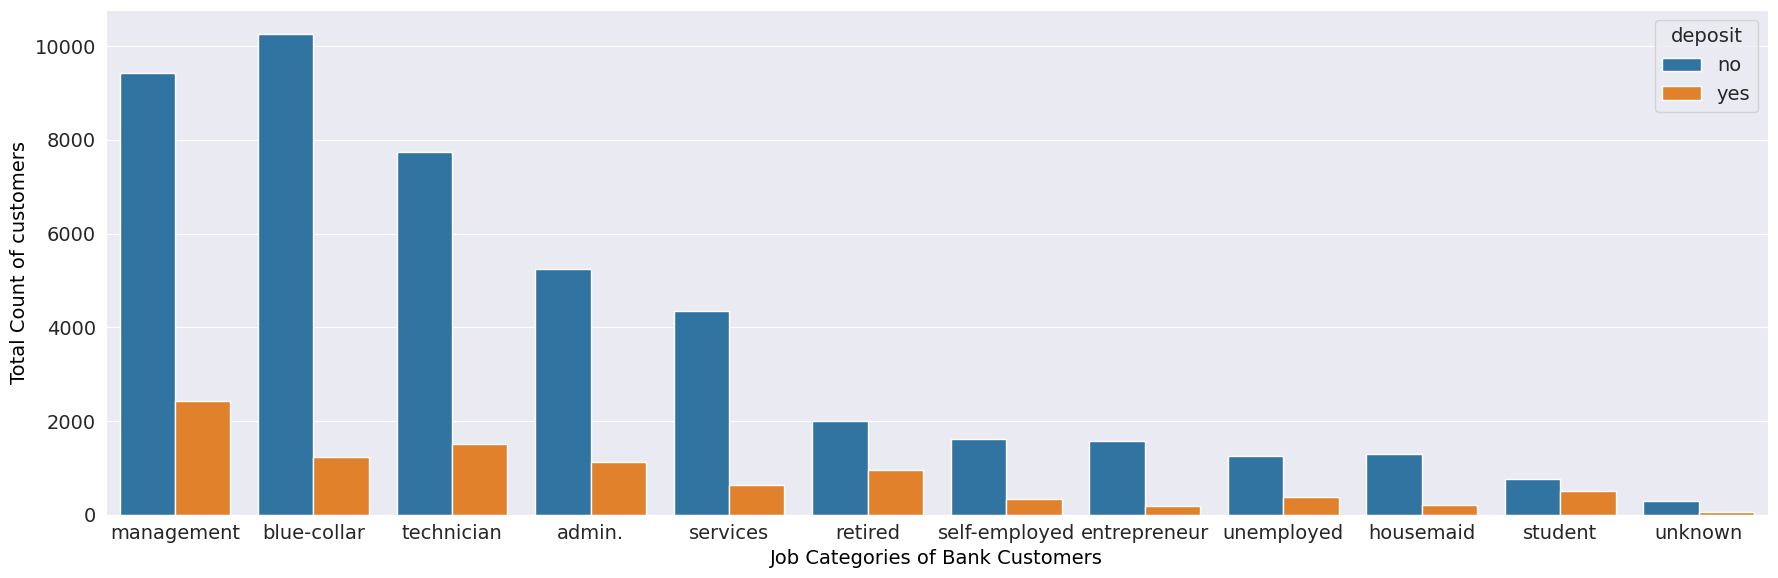

In [93]:
plt.figure(figsize=(18,6))
sns.countplot(x='job',hue='deposit', data=data, order=data['job'].value_counts().index)
plt.xlabel('Job Categories of Bank Customers', color='black')
plt.ylabel('Total Count of customers', color='black')
plt.tight_layout()
plt.show()

Ratio of number of customers to term deposits is high among students and retired.


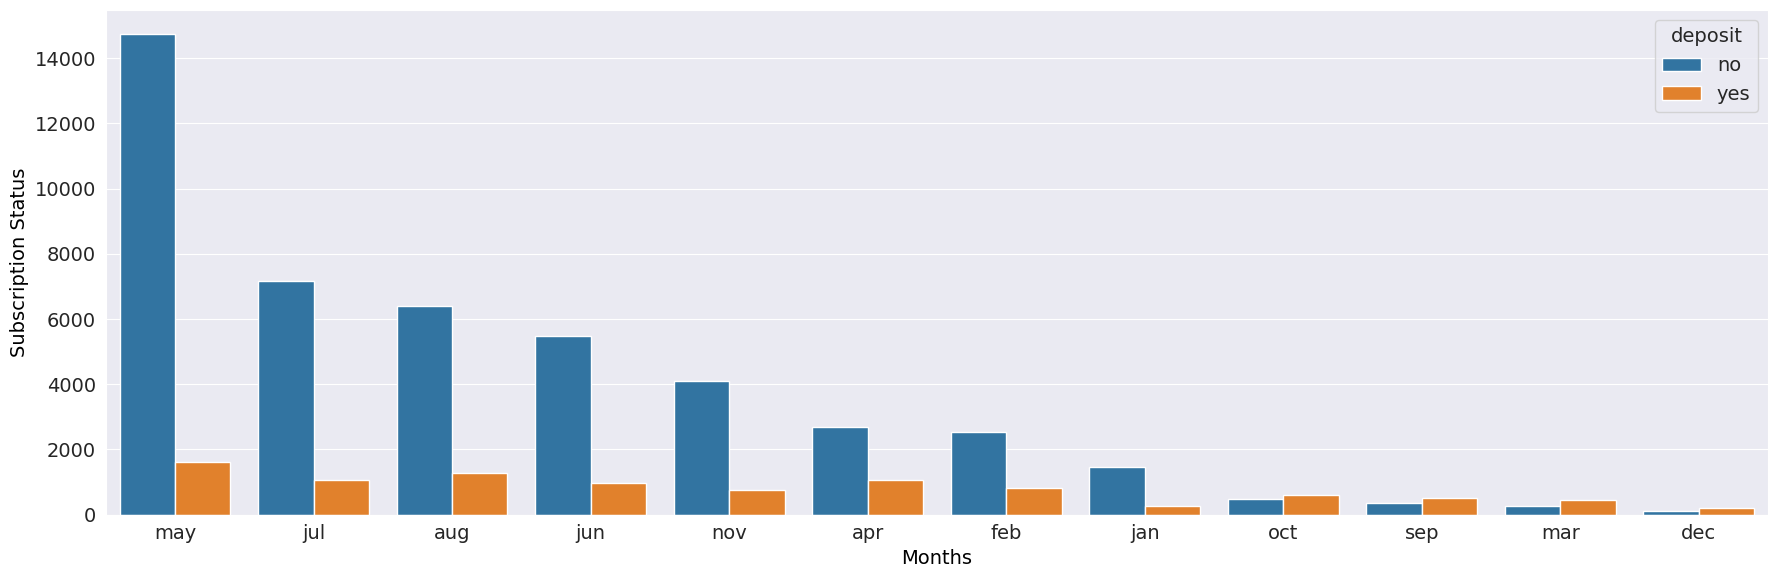

In [94]:
plt.figure(figsize=(18,6))
sns.countplot(x='month',hue='deposit', data=data, order=data['month'].value_counts().index)
plt.xlabel('Months', color='black')
plt.ylabel('Subscription Status', color='black')
plt.tight_layout()
plt.show()

Largest number of customers are approached in the month of may.The Month of april has a good ratio of number of customers and term deposits subscribed.

In [95]:
categorical = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

for column in categorical:
    fig = px.pie(data, names=column, title=f"Customers Percentage for column {column}",
                 hole=0.3, color_discrete_sequence=px.colors.qualitative.Plotly)
    fig.update_traces(textinfo='percent+label')
    fig.show()

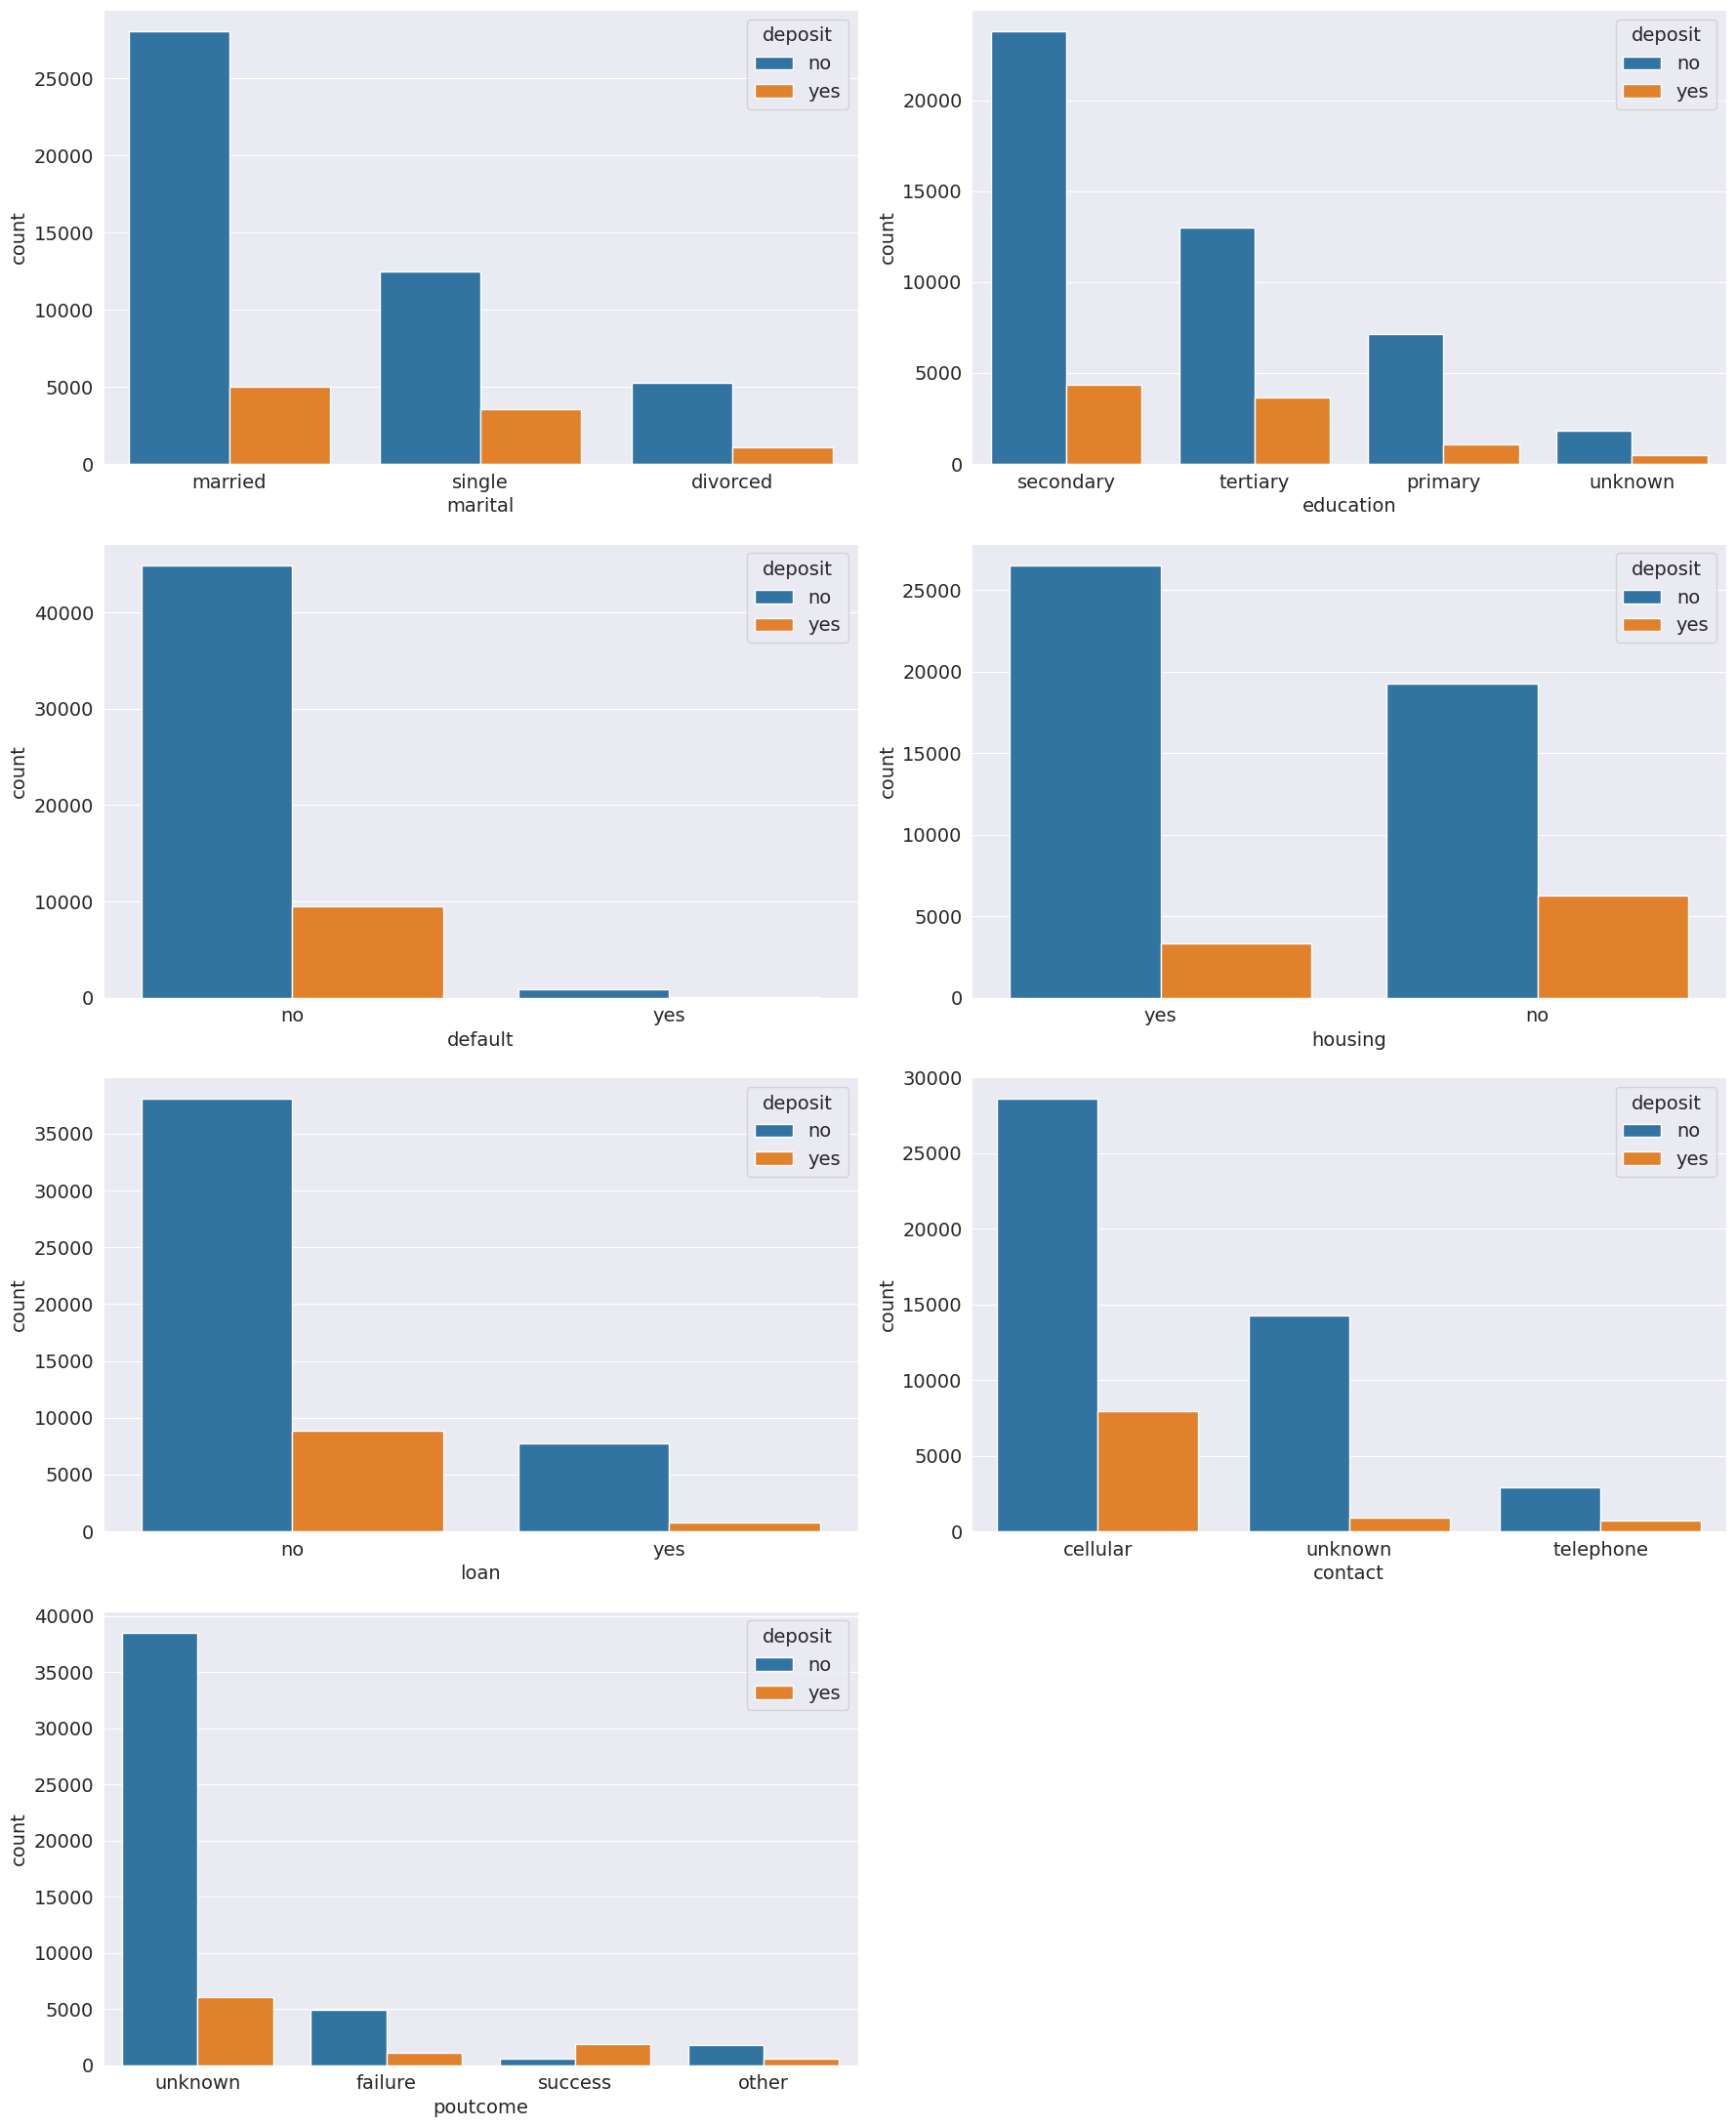

In [96]:

categorical = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

plt.figure(figsize=(18,22))
n = 1
for column in categorical:
  ax = plt.subplot(4,2,n)
  sns.countplot(x = column, hue='deposit', data=data, order=data[column].value_counts().index)
  plt.xlabel(column)
  plt.tight_layout()
  n += 1
plt.show()

Overall percentage of customers who secured secondary and tertiary education is 89.9% ,and the number of term deposits by them is high.
Ratio of the number of customers approached to the number of term deposits is high in case of single customers.
There are no deposits made by customers who have credit default.
Number of term deposits is low for customers who took housing loans or personal loans.


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55369 entries, 0 to 56372
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        55369 non-null  int64   
 1   job        55369 non-null  category
 2   marital    55369 non-null  category
 3   education  55369 non-null  category
 4   default    55369 non-null  category
 5   balance    55369 non-null  int64   
 6   housing    55369 non-null  category
 7   loan       55369 non-null  category
 8   contact    55369 non-null  category
 9   day        55369 non-null  int64   
 10  month      55369 non-null  category
 11  duration   55369 non-null  int64   
 12  campaign   55369 non-null  int64   
 13  pdays      55369 non-null  int64   
 14  previous   55369 non-null  int64   
 15  poutcome   55369 non-null  category
 16  deposit    55369 non-null  category
dtypes: category(10), int64(7)
memory usage: 3.9 MB


In [98]:
numerical_columns = [column for column in data.columns if (data[column].dtypes=='int64')]
numerical_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

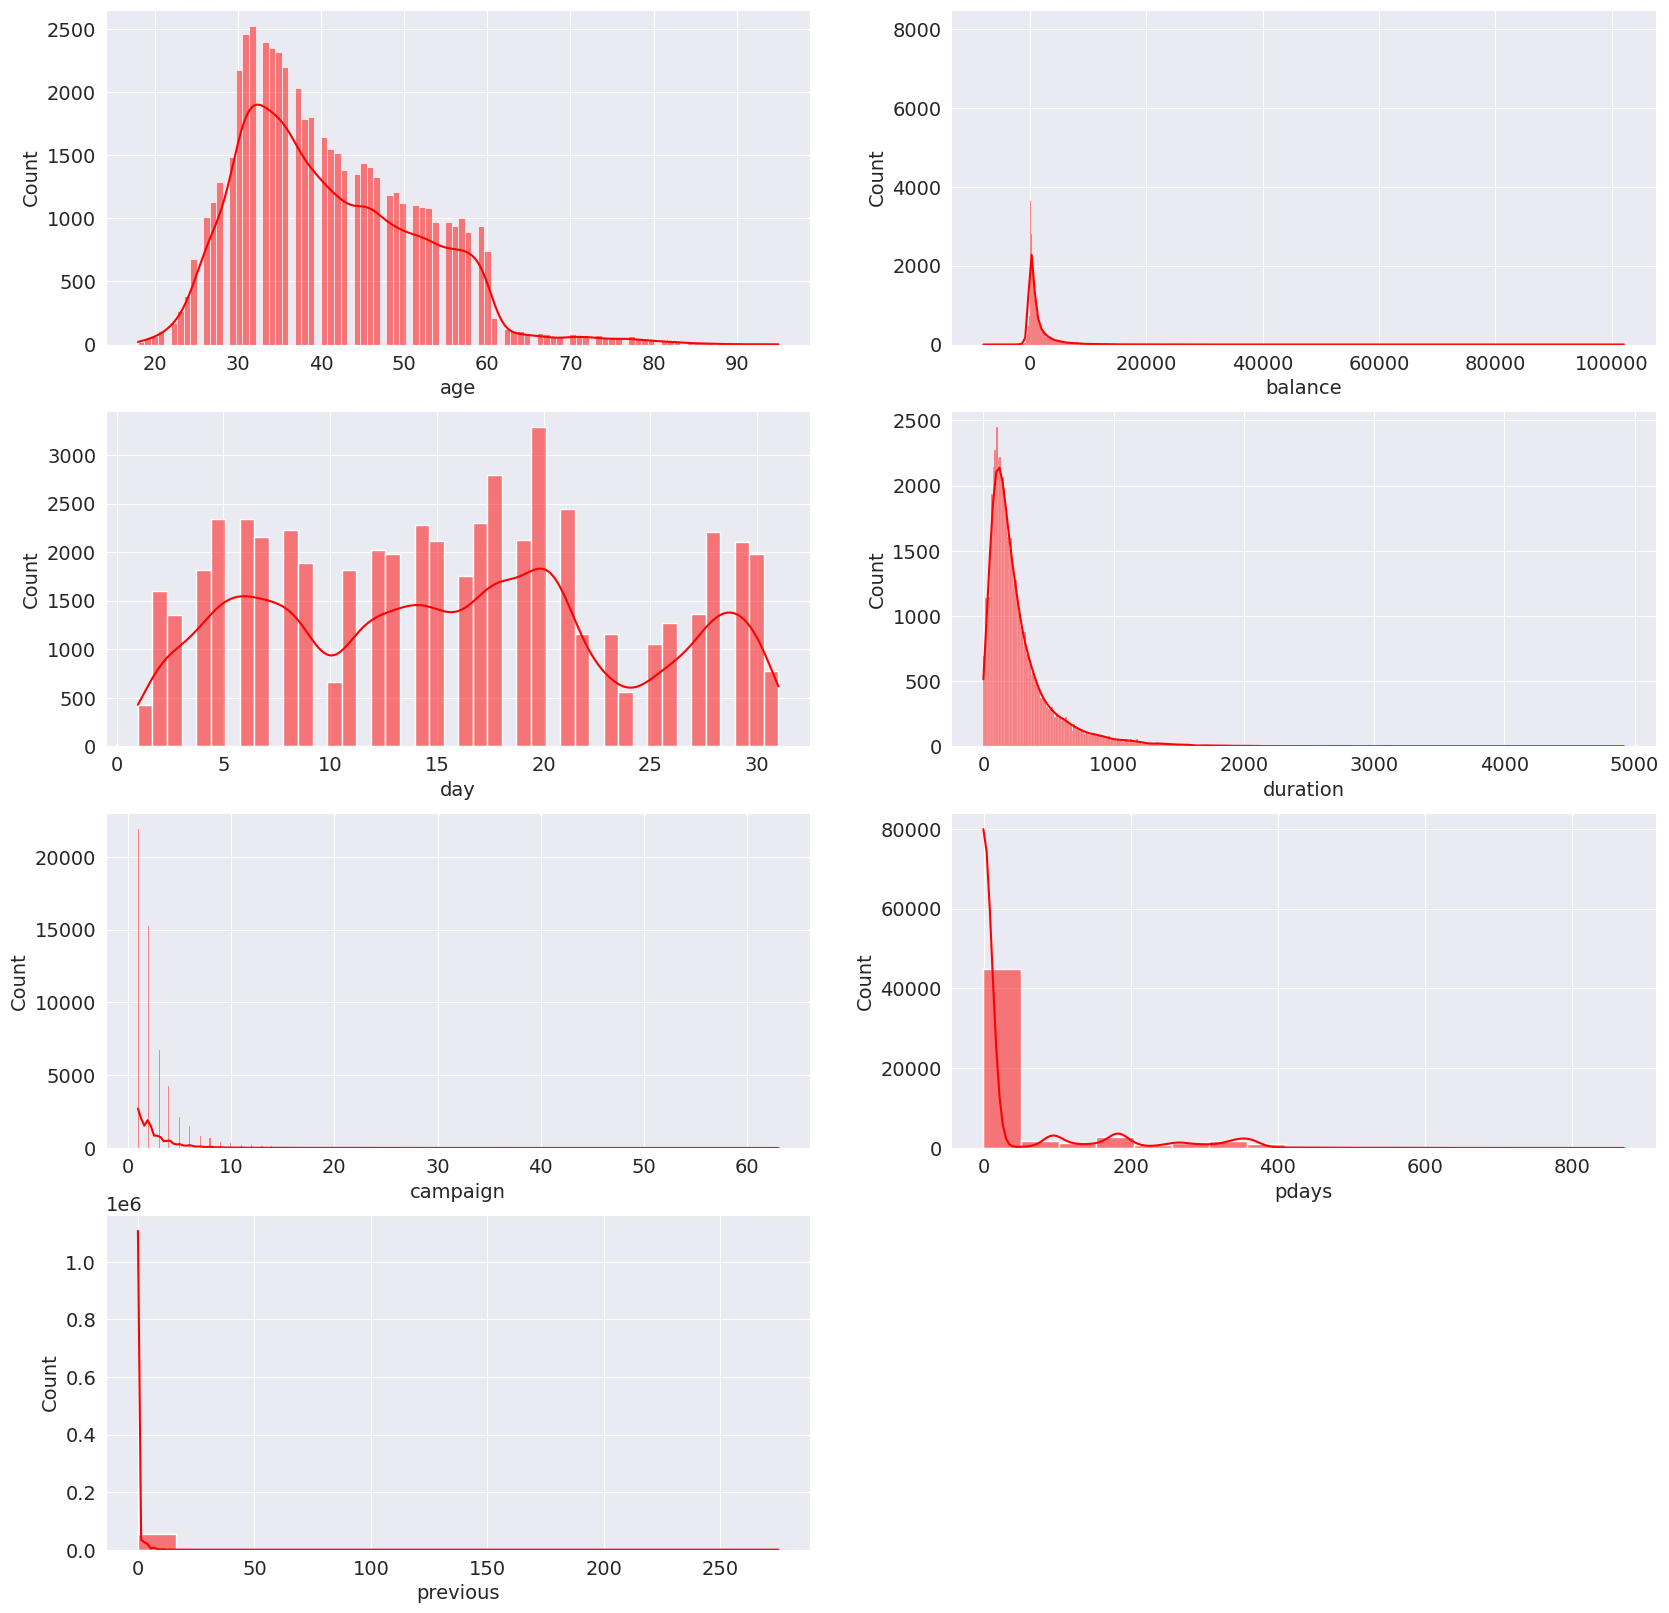

In [99]:
plt.figure(figsize=(20,20))

n=1
for col in numerical_columns:
  ax = plt.subplot(4,2,n)
  sns.histplot(data[col], kde=True, color ='red')
  n += 1
plt.show()

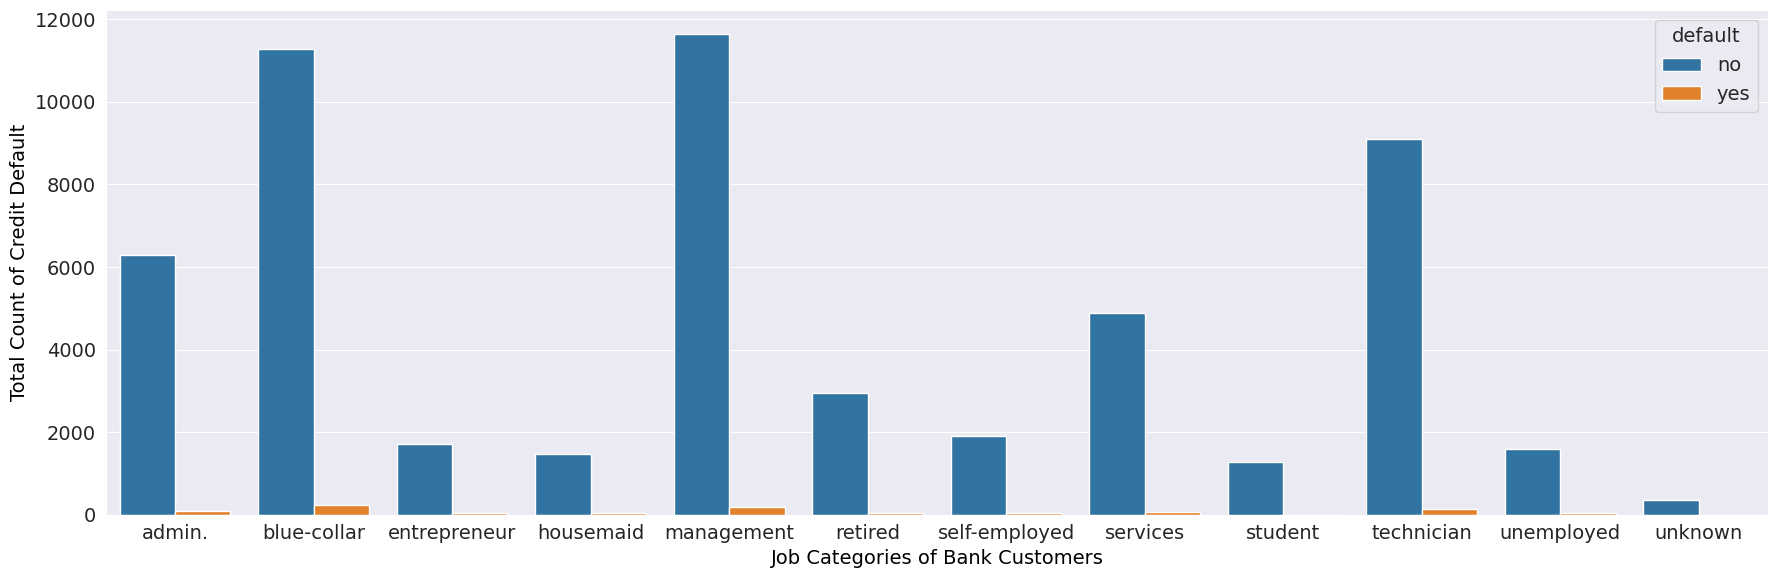

In [100]:
plt.figure(figsize=(18,6))

sns.countplot(x='job', hue='default', data=data)
plt.xlabel('Job Categories of Bank Customers', color='black')
plt.ylabel('Total Count of Credit Default', color='black')

plt.tight_layout()
plt.show()

More number of Credit defaults are seen among customers with job categories like Management,blue collar,technician,admin.

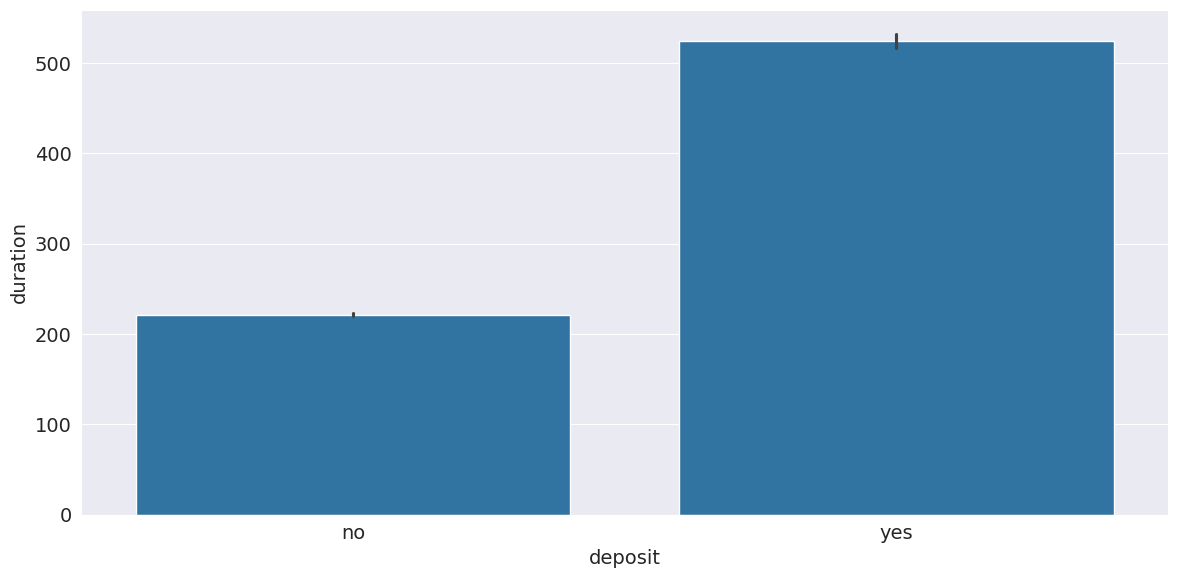

In [101]:
plt.figure(figsize=(12,6))

sns.barplot(y='duration',x='deposit',data=data)
plt.tight_layout()
plt.show()

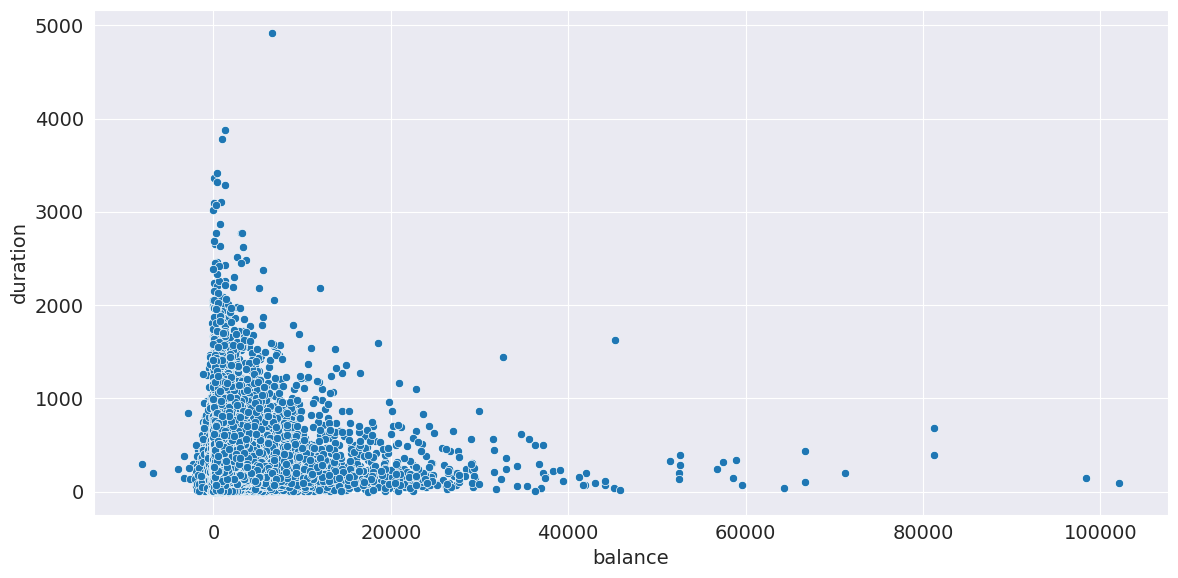

In [103]:

plt.figure(figsize=(12,6))

sns.scatterplot(x='balance', y='duration', data=data)
plt.tight_layout()
plt.show()

In [145]:
## Outlier Detection

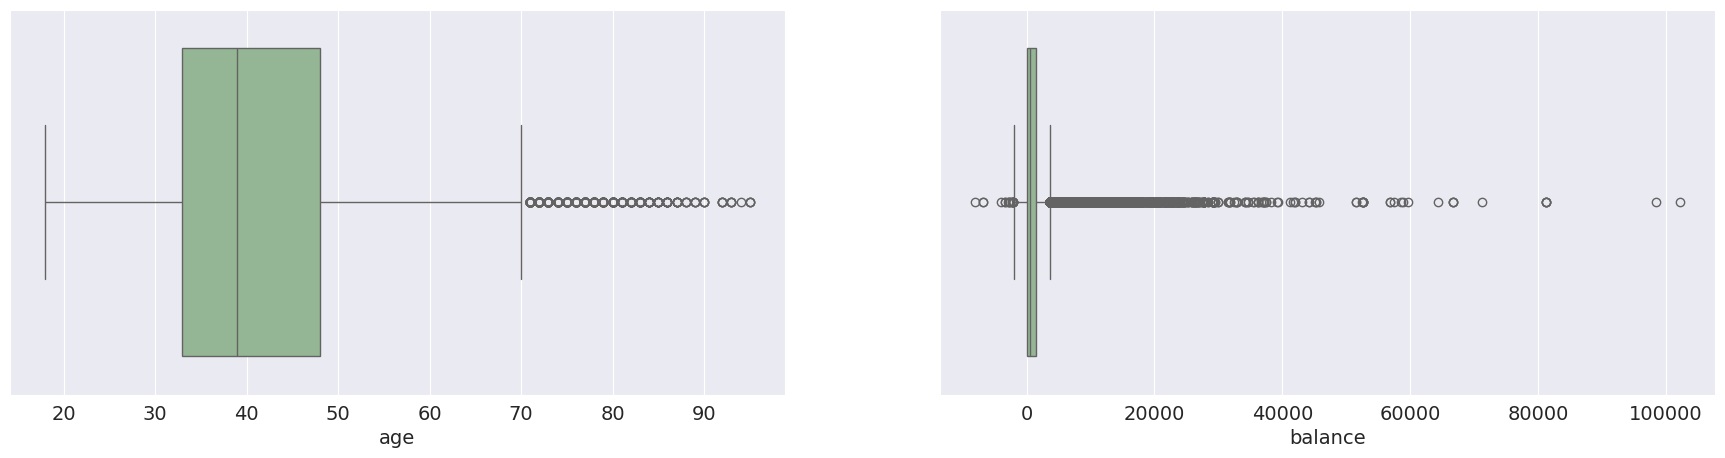

In [105]:
columns = ['age','balance']

plt.figure(figsize=(22,5))

n = 1
for col in columns:
    ax = plt.subplot(1,2,n)
    sns.boxplot(x=data[col], color='#8FBC8F')
    plt.xlabel(col)
    n += 1
plt.show()

In [106]:
data[data['balance']<=0]['balance'].count()

7738

# Data Preprocessing

In [107]:
data["default"]=data["default"].apply(lambda x : 1 if x=='yes' else 0)
data["loan"]=data["loan"].apply(lambda x : 1 if x=='yes' else 0)
data["housing"]=data["housing"].apply(lambda x : 1 if x=='yes' else 0)
data["deposit"]=data["deposit"].apply(lambda x : 1 if x=='yes' else 0)



In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55369 entries, 0 to 56372
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        55369 non-null  int64   
 1   job        55369 non-null  category
 2   marital    55369 non-null  category
 3   education  55369 non-null  category
 4   default    55369 non-null  category
 5   balance    55369 non-null  int64   
 6   housing    55369 non-null  category
 7   loan       55369 non-null  category
 8   contact    55369 non-null  category
 9   day        55369 non-null  int64   
 10  month      55369 non-null  category
 11  duration   55369 non-null  int64   
 12  campaign   55369 non-null  int64   
 13  pdays      55369 non-null  int64   
 14  previous   55369 non-null  int64   
 15  poutcome   55369 non-null  category
 16  deposit    55369 non-null  category
dtypes: category(10), int64(7)
memory usage: 3.9 MB


In [109]:

data['default'] = data['default'].astype('category').cat.codes
data['housing'] = data['housing'].astype('category').cat.codes
data['loan'] = data['loan'].astype('category').cat.codes
data['deposit'] = data['deposit'].astype('category').cat.codes

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55369 entries, 0 to 56372
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        55369 non-null  int64   
 1   job        55369 non-null  category
 2   marital    55369 non-null  category
 3   education  55369 non-null  category
 4   default    55369 non-null  int8    
 5   balance    55369 non-null  int64   
 6   housing    55369 non-null  int8    
 7   loan       55369 non-null  int8    
 8   contact    55369 non-null  category
 9   day        55369 non-null  int64   
 10  month      55369 non-null  category
 11  duration   55369 non-null  int64   
 12  campaign   55369 non-null  int64   
 13  pdays      55369 non-null  int64   
 14  previous   55369 non-null  int64   
 15  poutcome   55369 non-null  category
 16  deposit    55369 non-null  int8    
dtypes: category(6), int64(7), int8(4)
memory usage: 3.9 MB


In [111]:
marital = pd.get_dummies(data['marital'],prefix='marital')
contact = pd.get_dummies(data['contact'], prefix='contact')
poutcome = pd.get_dummies(data['poutcome'], prefix = 'poutcome')
month = pd.get_dummies(data['month'], prefix = 'month')
job = pd.get_dummies(data['job'],prefix = 'job_categories')
education=pd.get_dummies(data['education'],prefix = 'education')

In [112]:
data.drop(columns=['marital','contact','poutcome','month','education','job'], axis=1, inplace=True)

In [113]:
data = pd.concat([data,marital,contact,poutcome,month,job,education],axis=1)

In [114]:
data.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'deposit', 'marital_divorced',
       'marital_married', 'marital_single', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'job_categories_admin.', 'job_categories_blue-collar',
       'job_categories_entrepreneur', 'job_categories_housemaid',
       'job_categories_management', 'job_categories_retired',
       'job_categories_self-employed', 'job_categories_services',
       'job_categories_student', 'job_categories_technician',
       'job_categories_unemployed', 'job_categories_unknown',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown'],
      d

In [115]:
data.drop(columns=['marital_divorced','contact_unknown','poutcome_other','month_dec','education_unknown','job_categories_unknown',
                      ], axis=1, inplace=True)

In [116]:
data.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'deposit', 'marital_married',
       'marital_single', 'contact_cellular', 'contact_telephone',
       'poutcome_failure', 'poutcome_success', 'poutcome_unknown', 'month_apr',
       'month_aug', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'job_categories_admin.', 'job_categories_blue-collar',
       'job_categories_entrepreneur', 'job_categories_housemaid',
       'job_categories_management', 'job_categories_retired',
       'job_categories_self-employed', 'job_categories_services',
       'job_categories_student', 'job_categories_technician',
       'job_categories_unemployed', 'education_primary', 'education_secondary',
       'education_tertiary'],
      dtype='object')

In [117]:
data.shape

(55369, 43)

In [118]:
x=data.drop(columns=['deposit'],axis=1)
y=(data['deposit'])

In [119]:
print(x.shape)
print(y.shape)

(55369, 42)
(55369,)


In [120]:
x.head()

age  default  balance  housing  loan  day  duration  campaign  pdays  \
0   59        0     2343        1     0    5      1042         1     -1   
1   56        0       45        0     0    5      1467         1     -1   
2   41        0     1270        1     0    5      1389         1     -1   
3   55        0     2476        1     0    5       579         1     -1   
4   54        0      184        0     0    5       673         2     -1   

   previous  ...  job_categories_management  job_categories_retired  \
0         0  ...                      False                   False   
1         0  ...                      False                   False   
2         0  ...                      False                   False   
3         0  ...                      False                   False   
4         0  ...                      False                   False   

   job_categories_self-employed  job_categories_services  \
0                         False                    False   
1                         False                    False   
2                         False                    False   
3                         False                     True   
4                         False                    False   

   job_categories_student  job_categories_technician  \
0                   False                      False   
1                   False                      False   
2                   False                       True   
3                   False                      False   
4                   False                      False   

   job_categories_unemployed  education_primary  education_secondary  \
0                      False              False                 True   
1                      False              False                 True   
2                      False              False                 True   
3                      False              False                 True   
4                      False              False                False   

   education_tertiary  
0               False  
1               False  
2               False  
3               False  
4                True  

[5 rows x 42 columns]

In [121]:
x.isna().sum()

age                             0
default                         0
balance                         0
housing                         0
loan                            0
day                             0
duration                        0
campaign                        0
pdays                           0
previous                        0
marital_married                 0
marital_single                  0
contact_cellular                0
contact_telephone               0
poutcome_failure                0
poutcome_success                0
poutcome_unknown                0
month_apr                       0
month_aug                       0
month_feb                       0
month_jan                       0
month_jul                       0
month_jun                       0
month_mar                       0
month_may                       0
month_nov                       0
month_oct                       0
month_sep                       0
job_categories_admin.           0
job_categories

In [122]:
import imblearn
from imblearn.over_sampling import SMOTE

In [123]:
sampler=SMOTE()
X ,y = sampler.fit_resample(x,y)

In [124]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91590 entries, 0 to 91589
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   age                           91590 non-null  int64
 1   default                       91590 non-null  int8 
 2   balance                       91590 non-null  int64
 3   housing                       91590 non-null  int8 
 4   loan                          91590 non-null  int8 
 5   day                           91590 non-null  int64
 6   duration                      91590 non-null  int64
 7   campaign                      91590 non-null  int64
 8   pdays                         91590 non-null  int64
 9   previous                      91590 non-null  int64
 10  marital_married               91590 non-null  bool 
 11  marital_single                91590 non-null  bool 
 12  contact_cellular              91590 non-null  bool 
 13  contact_telephone             9

In [125]:
X.isna().sum()

age                             0
default                         0
balance                         0
housing                         0
loan                            0
day                             0
duration                        0
campaign                        0
pdays                           0
previous                        0
marital_married                 0
marital_single                  0
contact_cellular                0
contact_telephone               0
poutcome_failure                0
poutcome_success                0
poutcome_unknown                0
month_apr                       0
month_aug                       0
month_feb                       0
month_jan                       0
month_jul                       0
month_jun                       0
month_mar                       0
month_may                       0
month_nov                       0
month_oct                       0
month_sep                       0
job_categories_admin.           0
job_categories

In [126]:

print('Original Dataset length',len(x))
print('Resampled Dataset length',len(X))

Original Dataset length 55369
Resampled Dataset length 91590


In [127]:
y.value_counts()

deposit
1    45795
0    45795
Name: count, dtype: int64

# Model Training ,Hyper parameter Tuning,Evaluation on Test data

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(73272, 42)
(18318, 42)
(73272,)
(18318,)


In [130]:

def performance_metrics(actual,prediction,train_actual,train_predicted,model=''):

  print('----------------------------------------------------')
  print(f'{model} Test data accuracy Score', accuracy_score(actual,prediction))
  print(f'{model} Train data accuracy Score', accuracy_score(train_actual,train_predicted))
  print('-----------------------------------------------------')
  print(classification_report(actual,prediction))
  print('-----------------------------------------------------')

  conf_matrix = confusion_matrix(actual, prediction)
  print(conf_matrix)

  ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
  ax.set_title(f'Confusion Matrix for {model}')
  ax.set_xlabel('Predicted Val')
  ax.set_ylabel('Actual Val')
  ax.set_xticklabels(['No', 'Yes'])
  ax.set_yticklabels(['No', 'Yes'])

  return plt.show()

# KNN Classifier



Cross-validation score and best params
The best parameters are {'n_neighbors': 5, 'weights': 'uniform'}
Cross-validation score: 0.8937520431251762
----------------------------------------------------
KNN  Test data accuracy Score 0.9016268151544928
KNN  Train data accuracy Score 0.9272436947264985
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      9167
           1       0.84      0.99      0.91      9151

    accuracy                           0.90     18318
   macro avg       0.91      0.90      0.90     18318
weighted avg       0.91      0.90      0.90     18318

-----------------------------------------------------
[[7491 1676]
 [ 126 9025]]


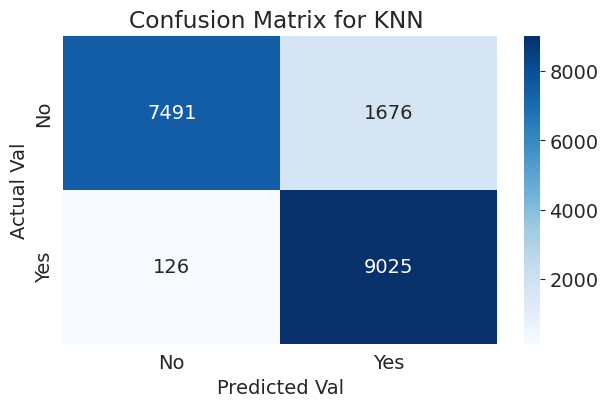

In [136]:

# Define the parameters for grid search
param_grid = {
    'n_neighbors': range(5, 20, 2),
    'weights': ['uniform'],
}

# create KNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, scoring='accuracy')

# Perform grid search to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model using the best parameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)

# Predictions
y_pred_train = best_knn.predict(X_train)
y_pred_test = best_knn.predict(X_test)


# Display cross-validation score and best parameters
print('\n')

print('Cross-validation score and best params')
print("The best parameters are", best_params)
print('Cross-validation score:', grid_search.best_score_)

# Calculate and display performance metrics
performance_metrics(y_test, y_pred_test, y_train, y_pred_train, 'KNN ')




# Logistic Regression



Cross-validation score and best params
The best parameters are {'max_iter': 50}
Cross-validation score: 0.8892619021260719
----------------------------------------------------
Logistic Regression Test data accuracy Score 0.8927830549186593
Logistic Regression Train data accuracy Score 0.8894529970520799
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      9167
           1       0.92      0.86      0.89      9151

    accuracy                           0.89     18318
   macro avg       0.89      0.89      0.89     18318
weighted avg       0.89      0.89      0.89     18318

-----------------------------------------------------
[[8453  714]
 [1250 7901]]


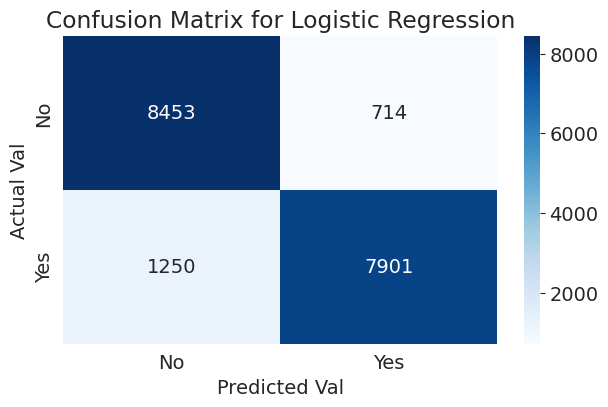

In [138]:
from sklearn.linear_model import LogisticRegression

parameters = {'max_iter': [50,100, 150,200, 250,300,350]}


lr= LogisticRegression(solver='liblinear')

grid_search_lr = GridSearchCV(lr, parameters, cv=10)

grid_search_lr.fit(X_train, y_train)

best_param_lr = grid_search_lr.best_params_

log_reg = LogisticRegression(solver='liblinear', max_iter=best_param_lr['max_iter'])
log_reg.fit(X_train, y_train)

# Predict the test dataset
y_pred_train_log_reg = log_reg.predict(X_train)
y_pred_log_reg = log_reg.predict(X_test)

# Display cross-validation score and best parameters
print('\n')

print('Cross-validation score and best params')
print("The best parameters are", best_param_lr)
print('Cross-validation score:', grid_search_lr.best_score_)

# Calculate and display performance metrics
performance_metrics(y_test, y_pred_log_reg, y_train, y_pred_train_log_reg, 'Logistic Regression')


# Random Forest Classifier

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   4.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   4.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   3.9s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   9.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   8.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  10.0s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   3.8s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   4.9s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   3.8s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=   8.4s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=   7.9s
[CV] END max_depth=10, min_samples_split=5, n_est

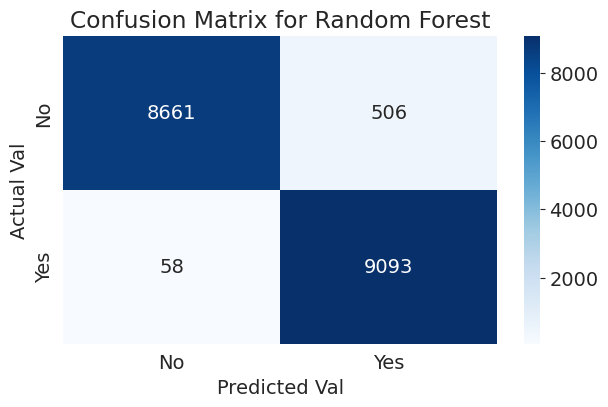

In [140]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Grid Search parameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Use the best model
best_rf = grid_search.best_estimator_

# Predict the test dataset
y_pred_train_rf = best_rf.predict(X_train)
y_pred_rf = best_rf.predict(X_test)

# Display cross-validation score and best parameters
print('\n')

print('Cross-validation score and best params')
print("The best parameters are", best_params)
print('Cross-validation score:', best_score)

# Calculate and display performance metrics
performance_metrics(y_test, y_pred_rf, y_train, y_pred_train_rf, 'Random Forest')

# Support Vector Machine Classifier

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 4.9min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 4.5min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 4.1min
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time= 5.9min
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time= 5.9min
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time= 5.7min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time= 3.7min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time= 3.6min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time= 3.8min
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=12.9min
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=13.6min
[CV] END ........................C=1, gamma=auto,

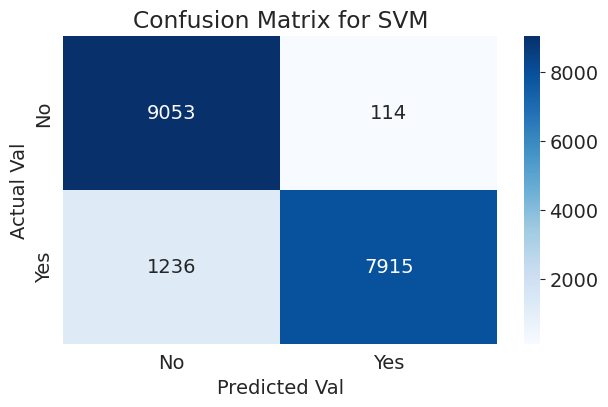

In [144]:

from sklearn.svm import SVC

# Initialize the SVM classifier
svm = SVC(random_state=42)

# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf']
}

# Set up Grid Search for hyperparameter tuning
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search_svm.fit(X_train, y_train)

# Best parameters and best score
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

# Use the best SVM model
best_svm = grid_search_svm.best_estimator_

# Predict the test dataset
y_pred_train_svm = best_svm.predict(X_train)
y_pred_svm = best_svm.predict(X_test)

# Display cross-validation score and best parameters
print('\n')

print('Cross-validation score and best params')
print("The best parameters are", best_params_svm)
print('Cross-validation score:', best_score_svm)

# Calculate and display performance metrics
performance_metrics(y_test, y_pred_svm, y_train, y_pred_train_svm, 'SVM')

 # Descion Tree Classifier

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=20; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=20; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=20; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2; total time=   0.

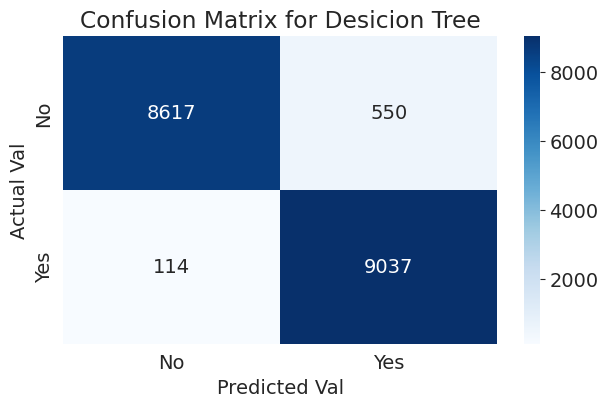

In [143]:

from sklearn.tree import DecisionTreeClassifier


# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for Decision Tree
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Set up Grid Search for hyperparameter tuning
grid_search_dt = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search_dt.fit(X_train, y_train)

# Best parameters and best score
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

# Use the best Decision Tree model
best_dt = grid_search_dt.best_estimator_


# Predict the test dataset
y_pred_train_dt = best_dt.predict(X_train)
y_pred_dt = best_dt.predict(X_test)

# Display cross-validation score and best parameters
print('\n')

print('Cross-validation score and best params')
print("The best parameters are", best_params_dt)
print('Cross-validation score:', best_score_dt)

# Calculate and display performance metrics
performance_metrics(y_test, y_pred_dt, y_train, y_pred_train_dt, 'Desicion Tree')